In [2]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

import sys, os
sys.path.insert(0, os.path.abspath('../'))
import footyviz

# Loading Data



In [3]:
data = pd.read_csv('../datasets/positional_data/liverpool_2019.csv', index_col=('play', 'frame'))
data.tail()


Unnamed: 0 bgcolor   dx   dy edgecolor  \
play                        frame                                           
Leicester 0 - [3] Liverpool 120          2745    blue  0.0  0.0     white   
                            121          2746    blue  0.0  0.0     white   
                            122          2747    blue  0.0  0.0     white   
                            123          2748    blue  0.0  0.0     white   
                            124          2749    blue  0.0  0.0     white   

                                   player  player_num     team          x  \
play                        frame                                           
Leicester 0 - [3] Liverpool 120     10267         NaN  defense  98.724826   
                            121     10267         NaN  defense  98.724826   
                            122     10267         NaN  defense  98.724826   
                            123     10267         NaN  defense  98.724826   
                            124     10267         NaN  defense  98.724826   

                                           y    z  
play                        frame                  
Leicester 0 - [3] Liverpool 120    53.720353  0.0  
                            121    53.720353  0.0  
                            122    53.720353  0.0  
                            123    53.720353  0.0  
                            124    53.720353  0.0

In [4]:
#list of goals included in the dataset
data.index.get_level_values('play').unique()

Index(['Liverpool [3] - 0 Bournemouth', 'Bayern 0 - [1] Liverpool',
       'Fulham 0 - [1] Liverpool', 'Southampton 1 - [2] Liverpool',
       'Liverpool [2] - 0 Porto', 'Porto 0 - [2] Liverpool',
       'Liverpool [4] - 0 Barcelona', 'Liverpool [1] - 0 Wolves',
       'Liverpool [3] - 0 Norwich', 'Liverpool [2] - 1 Chelsea',
       'Liverpool [2] - 1 Newcastle', 'Liverpool [2] - 0 Salzburg',
       'Genk 0 - [3] Liverpool', 'Liverpool [2] - 0 Man City',
       'Liverpool [1] - 0 Everton', 'Liverpool [2] - 0 Everton',
       'Bournemouth 0 - 3 Liverpool', 'Liverpool [1] - 0 Watford',
       'Leicester 0 - [3] Liverpool'],
      dtype='object', name='play')

In [5]:
def calculate_packing(game, startFrame, endFrame):
    players = []
    ball_start = [game[game['player'] == 0].loc[startFrame,'x'],game[game['player'] == 0].loc[startFrame,'y']]
    ball_end = [game[game['player'] == 0].loc[endFrame,'x'],game[game['player'] == 0].loc[endFrame,'y']]
    df3 = game.copy()
    df3.set_index('player',inplace = True)
    for player in df3.index.get_level_values('player').unique():  
        filt = (game['player'] == player)
        playerstart = game[filt].loc[startFrame,'x']
        playerend = game[filt].loc[endFrame,'x']
        if game[filt].loc[startFrame,'team'] == 'defense':
            if ((playerstart > ball_start[0] and playerend < ball_end[0]) or (playerstart < ball_start[0] and playerend > ball_end[0])):
    
                players.append(player)#([game[filt].loc[startFrame,'x'],game[filt].loc[startFrame,'y']])
    return players, ball_start, ball_end

def add_packing_to_frame(fig, axes, game, startFrame, endFrame):
    players, ball_start, ball_end = calculate_packing(game, startFrame, endFrame)
    axes.add_line(plt.Line2D([ball_start[0], ball_start[0]], [100, 0],
                    c='r'))
    axes.add_line(plt.Line2D([ball_end[0], ball_end[0]], [100, 0],
                    c='r'))
    axes.arrow(ball_start[0], ball_start[1], ball_end[0] - ball_start[0], ball_end[1] - ball_start[1], head_width=1, head_length=2, fc='k', ec='k')
    axes.text(40,105, str(len(players)) + " defenders taken out",fontsize = 16)
    return fig, axes





play = 'Genk 0 - [3] Liverpool'
df = data.loc[play]
df2 = calculate_packing(df,120,160)
print(df2)
df3 = df.copy()
df3.set_index('player',inplace = True)
df3.index.get_level_values('player').unique()
df3


([1634, 4777], [81.65123885580348, 30.402697785463644], [96.72225593289406, 48.102865155857856])


,Unnamed: 0,bgcolor,dx,dy,edgecolor,player_num,team,x,y,z
player,,,,,,,,,,
0,0,NaN,0.000000,0.000000,NaN,NaN,NaN,53.681930,2.109105,0.0
0,1,NaN,0.306820,0.248863,NaN,NaN,NaN,53.988750,2.357968,0.0
0,2,NaN,0.280467,0.227488,NaN,NaN,NaN,54.269217,2.585456,0.0
0,3,NaN,0.254115,0.206113,NaN,NaN,NaN,54.523331,2.791569,0.0
0,4,NaN,0.227762,0.184739,NaN,NaN,NaN,54.751093,2.976308,0.0
...,...,...,...,...,...,...,...,...,...,...
12853,4021,blue,0.000000,0.000000,white,NaN,defense,51.700680,41.176471,0.0
12853,4022,blue,0.000000,0.000000,white,NaN,defense,51.700680,41.176471,0.0
12853,4023,blue,0.000000,0.000000,white,NaN,defense,51.700680,41.176471,0.0


In [92]:

def get_possession_df(df):
    #get a DataFrame for Ball position
    dfBall = df.reset_index()[df.reset_index().player==0].set_index('frame')[['x', 'y']]

    #temporary DataFrame with all player's position relative to the ball 
    dfTemp = df.reset_index().set_index('frame').join(dfBall, rsuffix='_ball')
    dfTemp = dfTemp[dfTemp.player!=0]
    dfTemp['dif_x'] = dfTemp['x'].sub(dfTemp['x_ball'])
    dfTemp['dif_y'] = (dfTemp['y'] - dfTemp['y_ball'])

    #DataFrame with all the frames where a player touches or has close control of the ball.
    dfPossession = dfTemp[((dfTemp[['dif_x', 'dif_y']]==0).sum(axis=1))==2].reset_index()
    dfPossession.player_num = dfPossession.player_num.astype('Int64')
    return dfPossession



def get_passes_df(dfPossession):
    #determining the start end enf of each possession block
    poss_start = dfPossession[dfPossession['player']!=dfPossession.shift(1)['player']]
    poss_end = dfPossession[dfPossession['player']!=dfPossession.shift(-1)['player']]

    #relevant columns to keep in the final DataFrame
    columns = ['team', 'x', 'y', 'frame', 'player_num']
    
    #list of all changes in possession
    dfPasses = pd.concat([poss_end.reset_index()[columns].rename(lambda x: 'from_{}'.format(x), axis='columns'),
                          poss_start.iloc[1:].reset_index()[columns].rename(lambda x: 'to_{}'.format(x), axis='columns')
                         ], axis='columns')

    #keep all changes in possession from players of the same team
    dfPasses = dfPasses[dfPasses['from_team']==dfPasses['to_team']]
    return dfPasses

def get_passes_from_play(data, play):
    df = data.loc[play]
    dfPossession = get_possession_df(df)
    dfPasses = get_passes_df(dfPossession)
    dfPasses['play'] = play
    return dfPasses


class pass_connection:
    count = 1
    def __init__(self, player1, player2):
        self.players = [player1, player2]

        
        
        
dfFull = pd.concat([get_passes_from_play(data, play) for play in data.index.get_level_values('play').unique()])
dfFull2 = dfFull.copy()
dfFull2.set_index(["from_player_num"],inplace = True)
liste = []
dfFull = dfFull.dropna()
for index,row in dfFull.iterrows():
        liste.append([row["from_player_num"],row["to_player_num"]])
        
    
    

unique_list = [] 
for x in liste: 
    x.sort()
for x in liste: 
    m = 0
    for z in unique_list: 
        if z == x:
            m = 1
    if m == 0:
        unique_list.append(x)
print(unique_list)
print(liste) 
for l in unique_list:
    if liste.count(l) > 1:
        print(l)
        print(" " +str(liste.count(l)) + "\n")
    
        




[[8, 10], [8, 9], [9, 11], [4, 10], [10, 26], [9, 10], [11, 14], [9, 14], [14, 66], [9, 66], [5, 9], [5, 66], [11, 66], [27, 66], [10, 66], [14, 26], [26, 66], [10, 11], [11, 26], [10, 20], [10, 27], [10, 23], [8, 11], [7, 66]]
2
[[8, 10], [8, 9], [9, 11], [4, 10], [10, 26], [9, 10], [9, 10], [11, 14], [9, 14], [14, 66], [9, 66], [5, 9], [5, 66], [11, 66], [27, 66], [10, 66], [14, 66], [14, 66], [10, 66], [14, 66], [27, 66], [9, 10], [9, 10], [9, 10], [14, 26], [11, 14], [11, 14], [14, 66], [26, 66], [5, 9], [9, 11], [10, 11], [26, 66], [11, 26], [10, 20], [10, 27], [10, 66], [10, 23], [8, 11], [9, 10], [10, 11], [7, 66], [9, 66]]
[9, 11]
 2

[9, 10]
 6

[11, 14]
 3

[14, 66]
 5

[9, 66]
 2

[5, 9]
 2

[27, 66]
 2

[10, 66]
 3

[26, 66]
 2

[10, 11]
 2



,from_team,from_x,from_y,from_frame,from_player_num,to_team,to_x,to_y,to_frame,to_player_num,play
0,attack,46.394558,11.134454,0,10,attack,48.844160,27.191910,22.0,8,Liverpool [3] - 0 Bournemouth
1,attack,51.813185,28.611598,42,8,attack,85.565258,30.767056,108.0,9,Liverpool [3] - 0 Bournemouth
2,attack,85.565258,30.767056,108,9,attack,86.219036,33.236389,118.0,11,Liverpool [3] - 0 Bournemouth
0,attack,36.054422,68.277311,16,4,attack,82.955888,73.003584,78.0,10,Bayern 0 - [1] Liverpool
0,attack,47.429230,15.842044,14,26,attack,28.497923,7.131785,42.0,10,Fulham 0 - [1] Liverpool
1,attack,10.715205,23.615313,118,10,attack,0.677320,36.776241,154.0,9,Fulham 0 - [1] Liverpool
2,attack,0.677320,36.776241,154,9,attack,6.826108,44.926209,168.0,10,Fulham 0 - [1] Liverpool
2,attack,79.619324,60.777577,72,14,attack,59.108295,50.272940,110.0,11,Southampton 1 - [2] Liverpool
0,attack,30.978004,24.411719,56,9,attack,29.182930,63.574882,90.0,14,Liverpool [2] - 0 Porto
1,attack,26.807612,64.726955,120,14,attack,9.724839,73.723233,146.0,66,Liverpool [2] - 0 Porto


In [67]:

def calc_velocities(game,dt=0.05):
    game2 = game.copy()
    game2.set_index('player',inplace = True)
    attacking_team = []
    defending_team = []
    
    for player in game2.index.get_level_values('player').unique():  
        filt = (game['player'] == player)
        top_speed = 0
        player_num = game[filt].loc[1, 'player_num']
        sumup = 0
        i = 0
        for frame in game[filt].index.get_level_values('frame').unique():
            dx = (game[filt].loc[frame,'dx'] * 1.05) / dt
            dy = (game[filt].loc[frame,'dy'] * 0.68) / dt
            speed = np.sqrt( dx**2 + dy**2 )
            
            sumup = sumup + speed
            i = i+1
        avr = sumup / i
        if game[filt].loc[0,'team'] == 'defense':
            defending_team.append(avr)
            
            
        elif game[filt].loc[0,'team'] == 'attack':
            attacking_team.append(avr)
            
    
    return defending_team, attacking_team
avr1 = -2.640695312272015 #dont count the corner
avr2 = -2.5510708707535232 #dont count the corner



for game in data.index.get_level_values('play').unique():
    df = data.loc[game]
    score1,score2 = calc_velocities(df)
    print(max(score1))
    print(max(score2))
    print("\n")
    avr1 = avr1 + max(score1)
    avr2 = avr2 + max(score2)
    
print("final result defense: " + str(avr1/18))
print("final result attack: " + str(avr2/18))

    
    
       
        

        

TypeError: boolean value of NA is ambiguous

# Basic Plotting

You may have noticed I picked an interesting goal. It was my favorite football moment from 2019: a simple corner taken quickly.

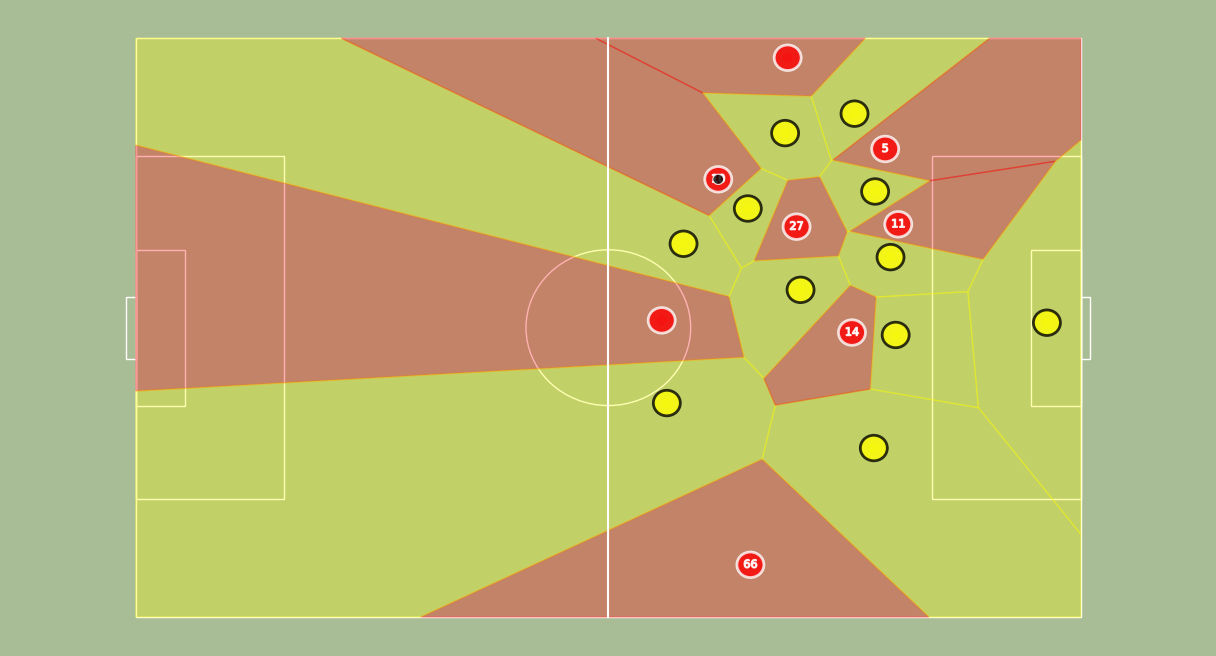

In [8]:
play = 'Liverpool [1] - 0 Wolves'
df = data.loc[play]
fig, ax, dfFrame = footyviz.draw_frame(df, t=0)
#fig, ax = add_packing_to_frame(fig, ax, df, 110, 150
                              #)
fig, ax, dfFrame = footyviz.add_voronoi_to_fig(fig, ax, dfFrame)




This was probably what was on Trent Alexander-Arnold's head:

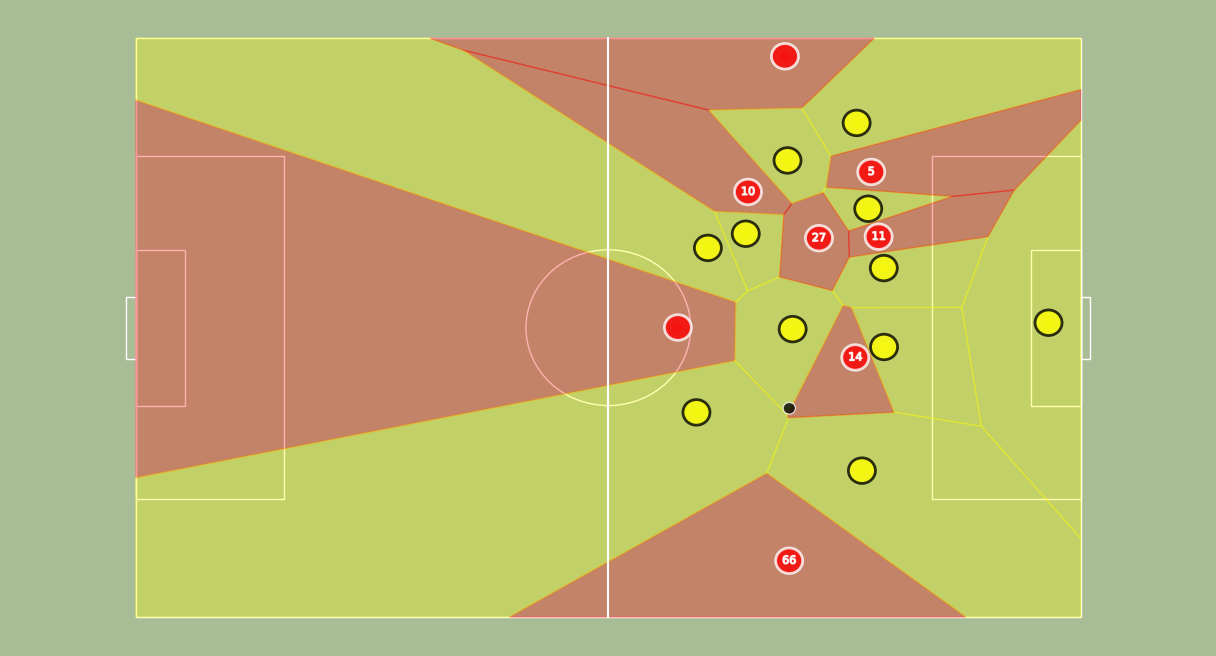

In [9]:
fig, ax, dfFrame = footyviz.draw_frame(df, t=1)
fig, ax, dfFrame = footyviz.add_voronoi_to_fig(fig, ax, dfFrame)

        Unnamed: 0 bgcolor        dx        dy edgecolor player_num     team  \
player                                                                         
0               80     NaN  0.567229 -0.389443       NaN                 NaN   
12             237     red  0.286346  0.042387     white         66   attack   
68             394     red  0.107820 -0.084380     white              attack   
424            551  yellow  0.287638 -0.047701     black             defense   
1209           708     red  0.165498 -0.154872     white          5   attack   
1652           865     red -0.014211 -0.338732     white         14   attack   
1776          1022     red  0.308916 -0.237338     white         10   attack   
2337          1179     red  0.171571 -0.142740     white         27   attack   
3300          1336     red  0.135459 -0.260217     white         11   attack   
3410          1493  yellow  0.206346 -0.226685     black             defense   
3411          1650  yellow  0.297164 -0.

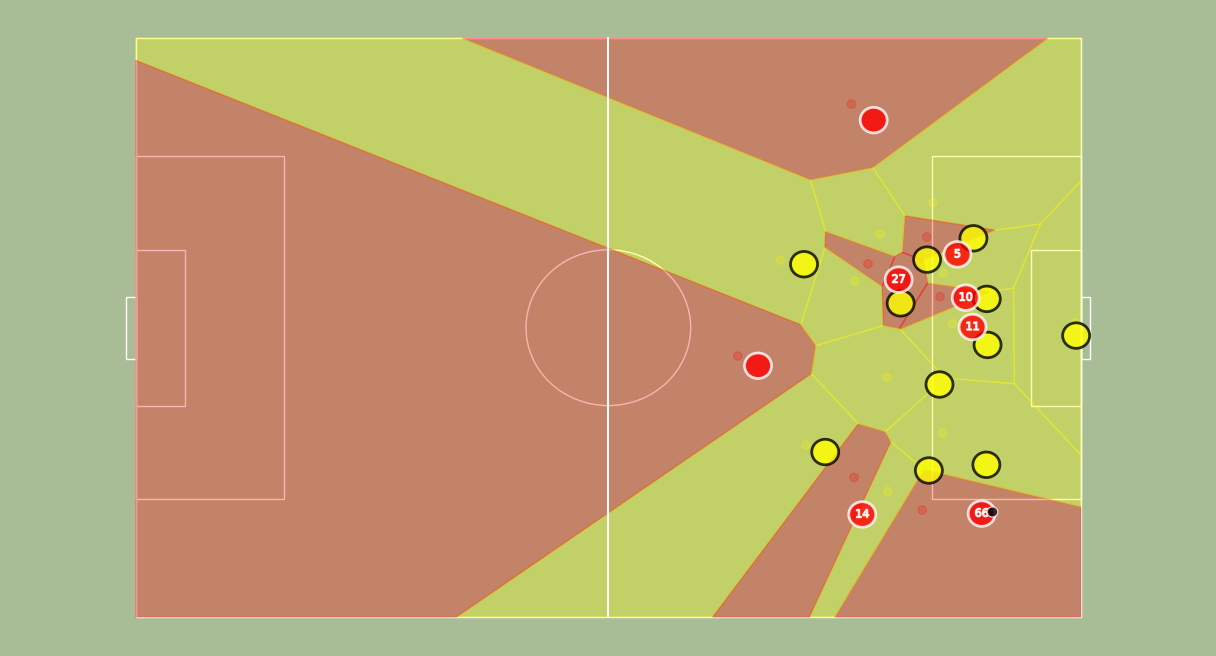

In [10]:
#you can mix different frames for the player's positioning and for the voronoi (e.g. fixing the voronoi to the time of the pass)
fig, ax, dfFrame = footyviz.draw_frame(df, t=5)
dfFrame_for_voronoi = footyviz.get_frame(df, t=4)
fig, ax, dfFrame = footyviz.add_voronoi_to_fig(fig, ax, dfFrame_for_voronoi)
print(dfFrame_for_voronoi)


# MoviePy

MoviePy is a Python module for video editing that works nicely with matplotlib and Jupyter and is built on top of FFmpeg. You may think you never used FFMpeg, but you have. From Wikipedia:

> FFmpeg is used by software such as VLC media player, xine, Cinelerra-GG video editor, Plex, Kodi, Blender, HandBrake, YouTube, and MPC-HC; it handles video and audio playback in Google Chrome, and Linux version of Firefox. 

You can find MoviePy's documentation at: https://zulko.github.io/moviepy/

Let's start with a basic animation:

In [11]:
from moviepy import editor as mpy
from moviepy.video.io.bindings import mplfig_to_npimage

def draw_frame_x(df, t, fps, voronoi=False):
    fig,ax,dfFrame = footyviz.draw_frame(df, t=t, fps=fps)
    if voronoi:
        fig, ax, dfFrame = footyviz.add_voronoi_to_fig(fig, ax, dfFrame)
    image = mplfig_to_npimage(fig)
    plt.close()
    return image    

def make_animation(df, fps=20, voronoi=False):
    #calculated variables
    length=(df.index.max()+20)/fps
    clip = mpy.VideoClip(lambda x: draw_frame_x(df, t=x, fps=fps, voronoi=voronoi), duration=length-1).set_fps(fps)
    return clip

clip = make_animation(df)
j = 1
liste = data.index.get_level_values('play').unique().values
print(liste[12])
for i in range (0,0):
    play = liste[i]
    df = data.loc[play]
    clip = make_animation(df)
    name = "Goal" + str(j) + ".mp4"
    clip.write_videofile(name)
    j = j+1
    



#clip.ipython_display()
#clip.write_videofile("Goal.mp4")

Genk 0 - [3] Liverpool


This isn't much different from what you can do with Matplotlib's native animate capabilities.

The advantage of having MoviePy in the mix is having easy accsess to editing, compositing and transformation functions. Let's try some examples:

In [12]:
#clip.rotate(90).ipython_display()

In [13]:
#moviepy allows for method chaining several effects in one line of code:
#clip.rotate(90).crop(y1=100, y2=500).ipython_display()

Linear editing is easy with the ``subclip`` method (for trimming) and ``concatenate_videoclips`` function (to join clips):

In [14]:
full_clip = mpy.concatenate_videoclips([make_animation(data.loc[play]) for play in data.index.get_level_values('play').unique()])

print('normal speed:', full_clip.duration, 'seconds')
print('2x speed:', full_clip.speedx(2).duration, 'seconds')

#full_clip.ipython_display(t=50)
#full_clip.write_videofile("AllGoals.mp4")

normal speed: 176.5 seconds
2x speed: 88.25 seconds


Non-linear editing uses the ``CompositeClip`` object:


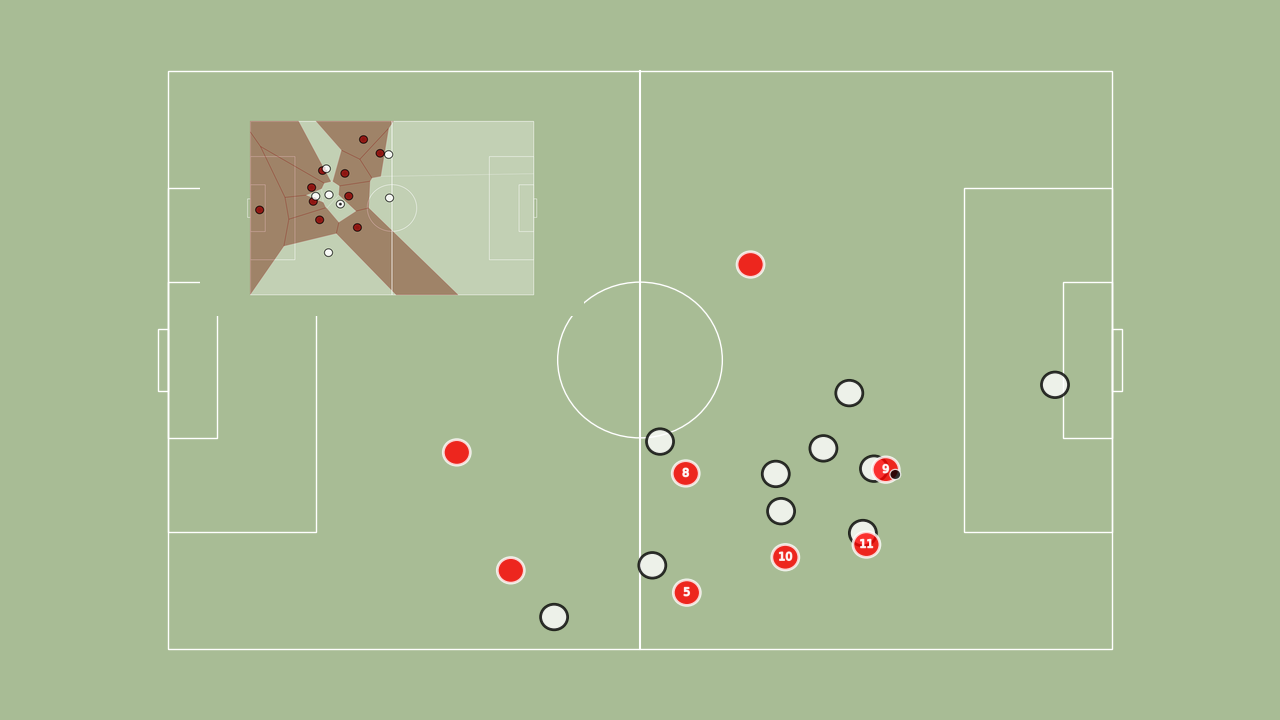

In [178]:
clip_voronoi = make_animation(df, voronoi=True)
composite_clip = mpy.CompositeVideoClip([clip, clip_voronoi.resize(0.3).set_position((200,100))])
composite_clip.ipython_display(t=4)